In [1]:
%reset -f
%load_ext autoreload
%autoreload

In [2]:
import numpy as np
import crc
import matplotlib.pyplot as plt
import matplotlib as mpl
import json

In [3]:
rc_params = {
    'axes.grid'             : False,
    'axes.labelsize'        : 24,
    'axes.linewidth'        : 1,
    'axes.titlesize'        : 24,
    'font.size'             : 24,
    'legend.fontsize'       : 16,
    'xtick.labelsize'       : 16,
    'ytick.labelsize'       : 16,
    # 'font.family'           :'sans-serif',
    'font.family'           :'serif',
    'text.latex.preamble'   : r'\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}',
    'text.usetex'           : False,
    'patch.force_edgecolor' : True,
    'figure.dpi'            : 256,
    'mathtext.fontset'      : 'cm'     
}

mpl.rcParams.update(rc_params)

In [4]:
scenarios = ['NS', 'AS']
n         = 3
modes     = ['2,2', '2,1', '3,3', '4,4', '4,3', '3,2']

In [5]:
%autoreload
channels = {}
for scenario in scenarios:
    channels.update({scenario: {}})
    for mode in modes:
        with open(f"../stats/{scenario}/mismatch_channel_{mode.replace(',', '_')}", "r") as infile:
            chan = crc.matrix_basis(json.load(infile))
            channels[scenario].update({mode: chan})

In [6]:
%autoreload
COLOURS = {'NS': crc.GET_COLOURS(), 'AS': crc.GET_COLOURS_opp()}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


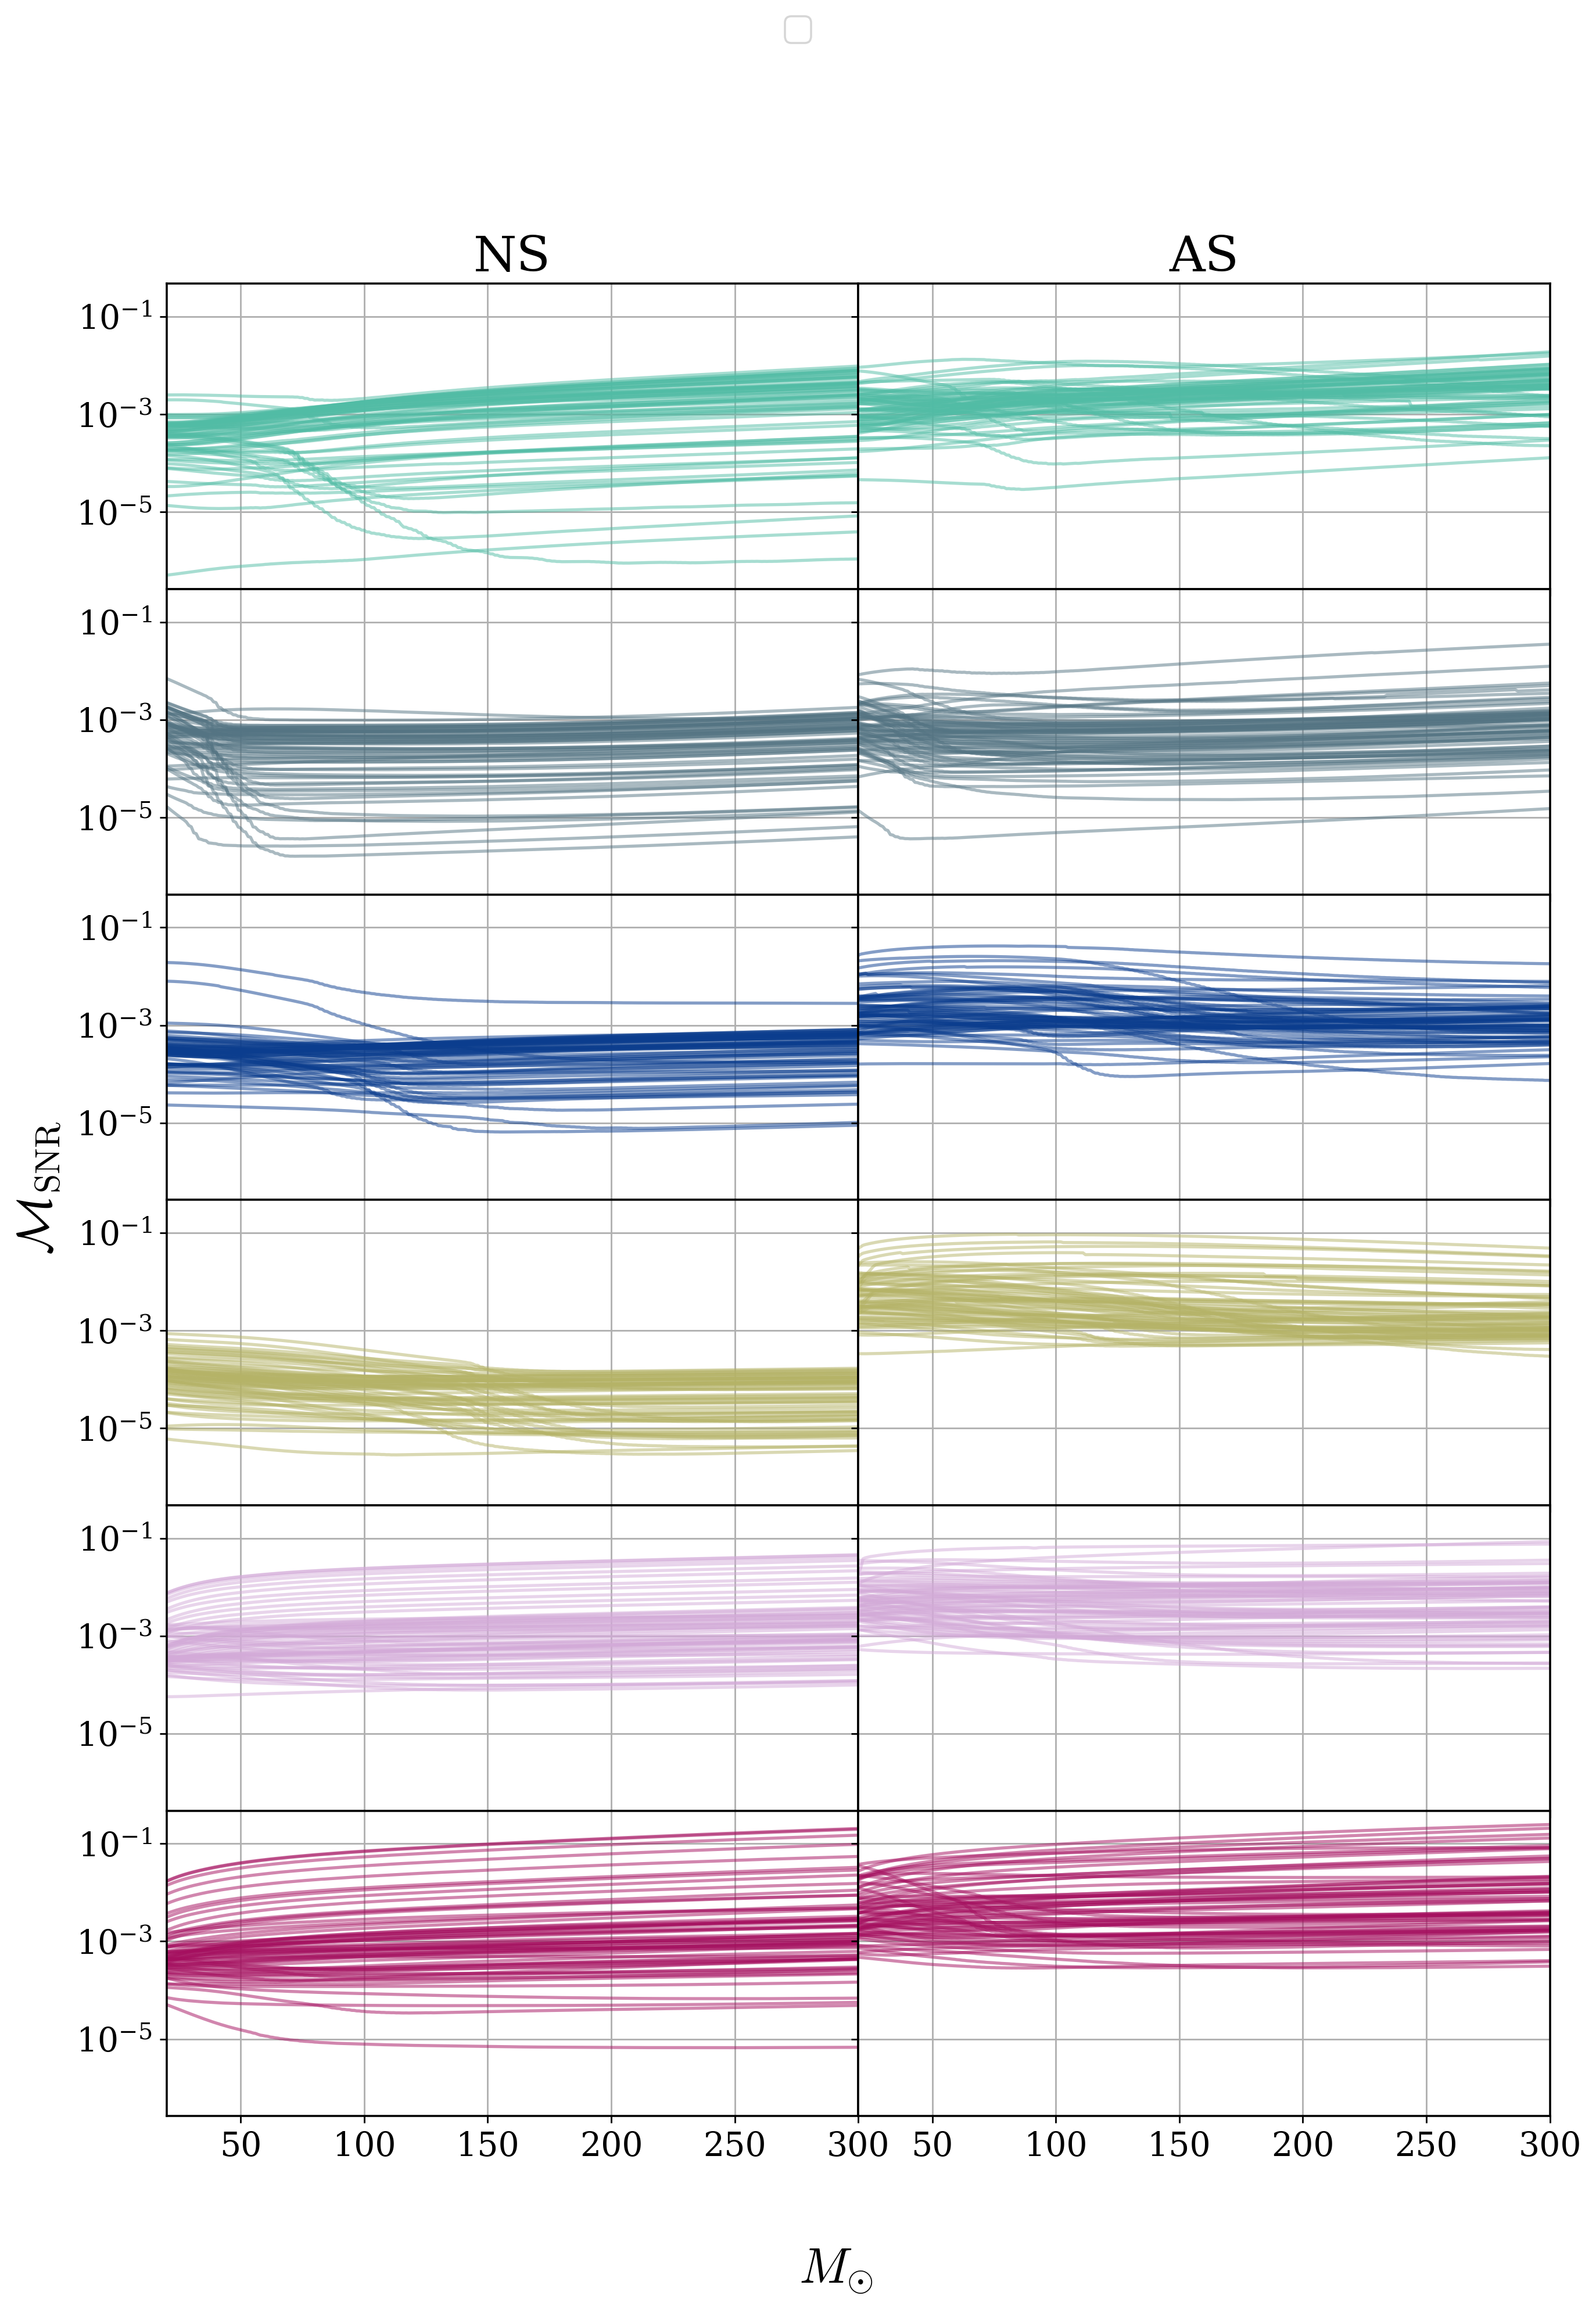

In [40]:
# row per mode, column per scenario
%autoreload
M_space = list(range(20, 301))
fig, axs = plt.subplots(len(modes), 2, figsize = (12, 16), sharex = True, sharey = True)
fig.subplots_adjust(wspace = 0)
fig.subplots_adjust(hspace = 0)

for i, row in enumerate(axs):
    # labels = [fr"$(\ell, m) = ({modes[i]})$"] + [None] * 63
    labels1 = [fr"$(\ell, m) = ({modes[i]})$"] + [None] * 63
    labels2 = [None] * 64
    labels = {0:labels1, 1: labels2}
    # print(labels.shape)
    for j, ax in enumerate(row):
        ax.grid()
        ax.plot(M_space, channels[scenarios[j]][modes[i]].T, c = COLOURS['NS'][modes[i]], alpha = 0.5)
                # , label = labels[j])   
        ax.set_xlim(20, 300)
        ax.set_yscale('log')
        # ax.set_xlabel(r"$M_{\odot}$")
        # ax.set_title(fr"{scenario}")
    # row[-1].legend()
# 64, 67
for j, col in enumerate(axs[0]):
    col.set_title(fr"{scenarios[j]}")
# for i, row in enumerate(axs[:, 0]):
#     row.set_ylabel(r"$\mathcal{M}_{\text{SNR}}$")
# for j, col in enumerate(axs[-1]):
#     col.set_xlabel(r"$M_{\odot}$")

fig.text(0.5, 0.04, r"$M_{\odot}$", ha='center')
fig.text(0.04, 0.5, r"$\mathcal{M}_{\text{SNR}}$", va='center', rotation='vertical')
        
fig.legend(loc = 'upper center', ncol=len(modes) / 2)
# fig.tight_layout()
plt.savefig(f"../figures/mismatch_channels")

In [ ]:
# row per mode, column per scenario
M_space = list(range(20, 301))
fig, axs = plt.subplots(len(modes), 1, figsize = (12, 24), sharex = True, sharey = True)
fig.subplots_adjust(wspace = 0)
fig.subplots_adjust(hspace = 0)

for i, ax in enumerate(axs):
    labels = [fr"{scenarios[0]}: $(\ell, m) = ({modes[i]})$", fr"{scenarios[1]}: $(\ell, m) = ({modes[i]})$"] + [None] * 126
    for j, scenario in enumerate(scenarios):
        ax.plot(M_space, channels[scenario][modes[i]].T, c = COLOURS[scenarios[j]][modes[i]], alpha = 0.5, label = labels[j::2])   
        ax.set_xlim(20, 300)
        ax.set_yscale('log')
        ax.set_ylabel(r"$\mathcal{M}_{\text{SNR}}$")
        # ax.set_xlabel(r"$M_{\odot}$")
        # ax.set_title(fr"{scenario}")
    # row[-1].legend()
        ax.legend( ncol=1, bbox_to_anchor=(1, 1))

# axs[0].set_title(fr"{scenarios[j]}")
axs[-1].set_xlabel(r"$M_{\odot}$")
        
# fig.legend( ncol=1, bbox_to_anchor=(1.15, 0.9), labelspacing=6)
# fig.tight_layout()
# plt.savefig(f"../figures/mismatch_channels")

In [ ]:
# row per mode, column per scenario
M_space = list(range(20, 301))
fig, axs = plt.subplots(1, 1, figsize = (12, 8), sharex = True, sharey = True)
fig.subplots_adjust(wspace = 0)
fig.subplots_adjust(hspace = 0)

for i, ax in enumerate(axs):
    labels = [fr"{scenarios[0]}: $(\ell, m) = ({modes[i]})$", fr"{scenarios[1]}: $(\ell, m) = ({modes[i]})$"] + [None] * 62
    for j, scenario in enumerate(scenarios):
        ax.plot(M_space, channels[scenario][modes[i]].T, c = COLOURS[scenarios[j]][modes[i]], alpha = 0.75, label = labels[j::2])   
        ax.set_xlim(20, 300)
        ax.set_yscale('log')
        ax.set_ylabel(r"$\mathcal{M}_{\text{SNR}}$")
        # ax.set_xlabel(r"$M_{\odot}$")
        # ax.set_title(fr"{scenario}")
    # row[-1].legend()

# axs[0].set_title(fr"{scenarios[j]}")
axs[-1].set_xlabel(r"$M_{\odot}$")
        
fig.legend(loc = 'upper center', ncol=len(modes))
# fig.tight_layout()
# plt.savefig(f"../figures/mismatch_channels")